# Paso 1. Importa los datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

games_df = pd.read_csv('games.csv')
# me parece que ustedes piden que el archivo vaya con la ruta: games_df = pd.read_csv('/datasets/games.csv')

# Paso 2. Prepara los datos.

In [2]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A simple vista podemos obervar que para 11 columnas tenemos un total de 16715 entradas, además tenemos valores ausentes en columnas como name, year_of_release, genre, pero de manera más significativa encontramos valores nulos en las columnas Critic_Score, User_Score y Rating. Otro de los elementos que podemos visibilizar rápidamente es que la información para Year_of_Release se encuentra como dato tipo float lo que nos limita la posibilidad de trabajar operaciones con fechas y no es tan adecuado al dato que busca describir.

Renombraremos las columnas y se convierte todo a minúsculas para que todas cumplan el criterio snake case.

In [3]:
games_df.rename( columns= {'Name':'name', 'Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales', 'EU_sales':'eu_sales', 'JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score', 'User_Score':'user_score','Rating':'rating'}, inplace=True)

Como primera observación los datos de las columnas 'user_score' y 'rating' podrían tener una mayor funcionalidad transformados a datos de tipo float, que son más acordes al tipo de dato que describen, y que quizá nos permitan efectuar operaciones con ellos.Asimismo, las columnas critic_score, user_score y rating tienen muchos datos nulos.

#### rating

In [4]:
games_df['rating'].isna().sum()

6766

In [5]:
games_df['rating'].count()

9949

En específico, la columna rating tiene 6766 valores ausentes. La gran cantidad de datos ausentes respecto del total, en esta y otras columnas es un fuerte indicador de que no deberíamos eliminar los valores nulos.

In [6]:
games_df['rating'].value_counts()

rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

Si visualizamos comportamiento de los datos de rating a lo largo de los años, podríamos obtener algunas conclusiones: 

<Axes: xlabel='year_of_release'>

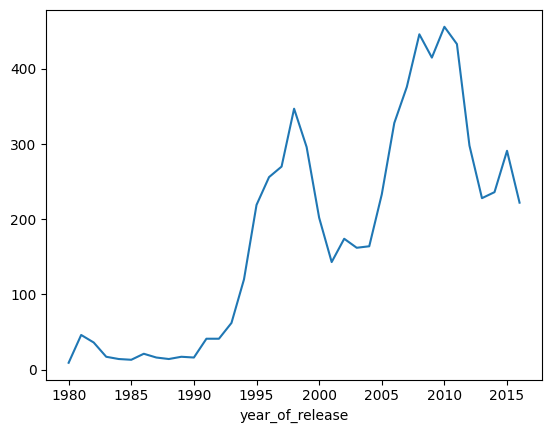

In [7]:
games_df['rating'].isna().groupby(games_df['year_of_release']).sum().plot(kind='line')

Como vemos, antes del año 1993, los valores suelen estar muy próximos a cero, lo que nos indicaría que quizá, la práctica de evaluar u otorgar un rating a los videojuegos era inexistente.

#### user_score

In [8]:
games_df['user_score'].count()

10014

In [9]:
display(games_df['user_score'].value_counts().head())

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
Name: count, dtype: int64

Ahora bien, si analizamos un poco más la columna user_score para entender qué tipo de valores nulos tenemos, el resultado nos muestra 2424 valores 'tbd' - to be determined. Esto pudiese sugerir que el video juego no cuenta con puntuaciones de usuario, o bien, que el juego es de muy reciente creación, etc. Sin embargo, aunque estas puntuaciones no se tienen en este momento se ha decidido que no deben descartarse / eliminarse por la misma razón que en la columna rating.

Ahora, si añadimos el mismo ejercicio en el que tratamos de observar el comportamiento de la columna user_score  a lo largo de los años notaremos que siguen exactamente la misma tendencia que rating. Es decir, para antes de 1992 casi no había puntajes, lo cual nos hace pensar que esta práctica no existía y que no es hasta después de ese año en que paulatinamente empieza a incrementarse.

<Axes: xlabel='year_of_release'>

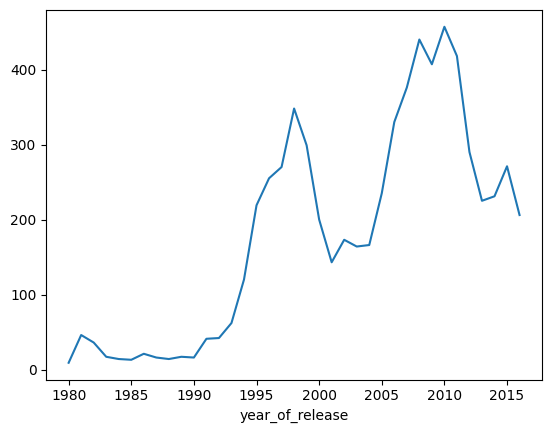

In [10]:
games_df['user_score'].isna().groupby(games_df['year_of_release']).sum().plot(kind='line')


Como no podemos transformar datos de tipo object a tipo float si estos contienen datos nulos o, como en este caso: tbd; primero debemos determinar cuál será el tratamiento de los mismos. 

Una opción pudiese ser el reemplazar definitivamente los valores tbd por 0, lo cual, significaría alterar los resultados de los datos. Esto podría interpretarse no como una falta o ausencia de calificaciones de parte del usuario, sino que el usuario calificó y el puntaje obtenido fue de 0.

Como alternativa, se plantea el transformar los datos tbd otorgándoles un valor numérico pero creando una nueva columna: user_score_adjusted para poder trabajar con esta información sin perder la data original.

In [11]:
games_df['user_score_adjusted'] = np.where(
games_df['user_score'] == 'tbd', 
0,
games_df['user_score']
)

In [12]:
games_df['user_score_adjusted'] = games_df['user_score_adjusted'].astype('float')

Como resultado, se crea una nueva columna que permitirá utilizar la puntuación del usuario, sin eliminar los tbd pero transformando el dato a float.

In [13]:
games_df['user_score_adjusted'].value_counts().sort_index()

user_score_adjusted
0.0    2425
0.2       2
0.3       2
0.5       2
0.6       2
       ... 
9.3      31
9.4      11
9.5       6
9.6       2
9.7       1
Name: count, Length: 95, dtype: int64

#### Valores nulos.

Como conclusión respecto al tratamiento de los valores nulos en la base de datos, se prefirió no eliminar los valores nulos debido a  las siguientes razones:

1. Hay una cantidad muy muy grande y significativa de datos que poseen valores nulos en las columnas critic_score, user_score y rating, y el eliminarlos pudiese alterar de manera relevante las conclusiones derivadas de los datos. La eliminación de todos ellos supone perder una cantidad muy significativa de los datos, simplemente no es deseable.

2. La distribución de los datos para estas columnas, muestra que en general, los datos ausentes se encuentran mayormente en datos que preceden al año 1993, lo cual, de mantenerse así nos permite visibilizar que antes de esta fecha posiblemente no existia el sistema de calificación de los juegos, y que para el consumidor esta no era una parte fundamental de su decisón de compra.  Tener presente este elemento frente a la toma de decisiones o eliminar los datos previos a 1993 es mucho más manejable.

Si deseamos eliminar los datos previos o iguales a 1993, lo más recomendable sería la creación de una nueva columna:'released' en la que 'year_of _release' se transforma a dato datetime, para así darnos más opciones para utilizarlo y evitar perder la data original.

In [14]:
games_df['released'] = pd.to_datetime(games_df['year_of_release'], format= "%Y")

#### name

In [15]:
games_df['name'].count()

16713

Identificaremos cuántos valores o nombres únicos, y cuántos valores repetidos de nombres de juegos existen en la base de datos.

In [16]:
games_df['name'].nunique()

11559

In [17]:
games_df['name'].duplicated().sum()

5155

Continuando con la exploración de datos encontramos que tenemos 5155 nombres o títlos de juegos duplicados, sin embargo, esto tiene sentido puesto que cada juego pudiera estar disponible en múltiple plataformas; por lo cual se sugiere dejar sin modificaciones.

#### Calculamos las ventas totales (la suma de las ventas en todas las regiones) para cada juego, y colocamos estos valores en una columna separada: game_total_sales.

In [18]:
games_df['total_sales'] = games_df['na_sales'] + games_df['eu_sales'] + games_df['jp_sales'] + games_df['other_sales']

In [19]:
display(games_df.head(2))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,user_score_adjusted,released,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,8.0,2006-01-01,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN,1985-01-01,40.24


In [20]:
games_df['total_sales'].describe()

count    16715.000000
mean         0.533396
std          1.548261
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

Considerando todas las plataforma en nuestra base de datos, el juego con el máximo de ventas tiene 1062,33 (millones), mientras tanto, el que menos ventas tuvo muestra un total de 0.03.

# 3.  Analiza los datos.

#### ¿Cuántos juegos fueron lanzados en diferentes años?

<Axes: xlabel='released'>

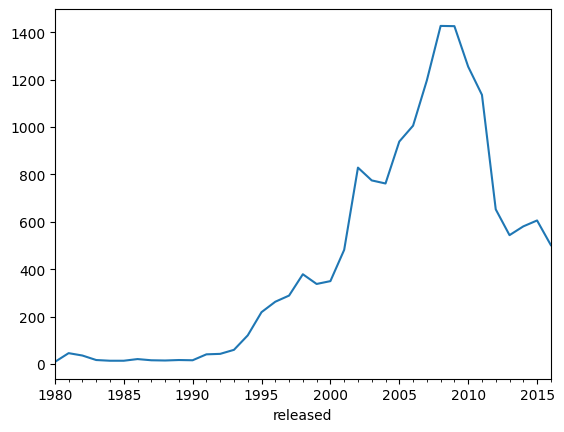

In [21]:
games_df.groupby('released')['name'].count().plot(kind='line')

Aquí podemos ver la evolución del mercado de videojuegos, desde la creación de los primeros juegos y consolas en los años ochenta, muy pocos juegos eran lanzados al mercado. Lo cual los vuelve poco signficativos para la toma de decisiones actuales.

####  Ventas totales de todas las plataformas.

¿Cómo varían las ventas? Las ventas parecen tener un punto máximo de ventas y luego un descenso que se asocia a la introducción de una nueva plataforma.

<Axes: xlabel='released'>

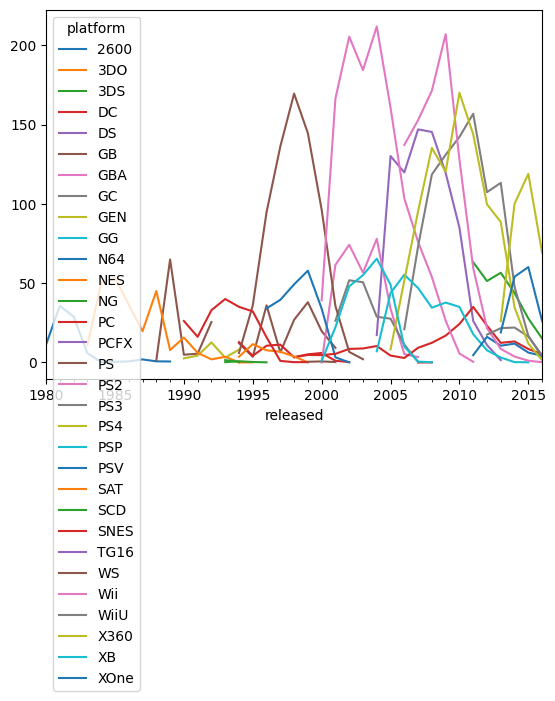

In [22]:
games_df.pivot_table(index="released", columns="platform", values="total_sales", aggfunc="sum").plot(kind="line")

In [ ]:
nintendo = ["NES", "SNES", "N64", "Wii", "WiiU"]
nintendo_portable = ["GB","GC","GBA", "DS", "3DS"]
xbox = ["XB", "X360", "XOne"]
play_station = ["PS","PS2","PS3","PS4"]
play_station_portable = ["PSP","PSV"]

#### ¿Cuáles son las plataformas con más ventas?

Identificamos las 8 plataformas más populares a lo largo de los años.

In [26]:
top_sales_plat = games_df.groupby('platform')['total_sales'].sum().sort_values().tail(5)
display(top_sales_plat)

platform
DS       806.12
Wii      907.51
PS3      939.65
X360     971.42
PS2     1255.77
Name: total_sales, dtype: float64

In [24]:
top_sales_plat = list(games_df.groupby('platform')['total_sales'].sum().sort_values().tail(15).index)                                                                                     
print(top_sales_plat)

['N64', 'NES', 'GB', 'XB', '3DS', 'PC', 'PSP', 'PS4', 'GBA', 'PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']


In [ ]:
#platform_top_sales.describe()

A continuación encontraremos algunos datos relevantes a esas plataformas, como el mínimo y máximo de ventas globales, dentro del grupo que conforman esas plataformas.

Considerando todas las plataforma en nuestra base de datos, la plataforma con el máximo de ventas tiene 1062,33 (millones), mientras que la plataforma que menos ventas tuvo muestra un total de 0.03. Arriba odemos observar que, sería PS2 la que tiene más ventas. 

### ¿Cuáles son las plataformas que solían ser populares pero que ahora no tienen ventas? ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?


La lista de las 15 plataformas que acumulan más ventas a lo largo de la historia es encabezada por Play Station 2, seguida por Xbox 360, mientras que en su posición más baja se encuentra Nintendo 64.

In [ ]:
(
    games_df[games_df['platform'].isin(top_sales_platforms)]
    .pivot_table(index='released',
                 columns= 'platform',
                 values='game_total_sales',
                 aggfunc='sum',
                 )
                 .plot(kind='line',
                       title='Top sales platforms by year')

)

Como podemos observar, dentro de la lista de las 15 plataformas que más ventas han registrado a lo largo de los años, podemos ver que NES y Game Boy, dominaron el mercado/registraron sus mayores ventas antes de 1992, donde comienzan a desaparecer; dando lugar a las plataformas con más ventas históticas (al menos en esta base de datos) con un despegue de sus ventas después de los años 1993 - 1994.

Es importante observar estos datos pues nos ayuda a responder la pregunta sobre las plataformas que solían ser populares y que ahora no tienen ventas. Como mencionamos, la primer consola de Nintendo y GameBoy eran claramente las favoritas entre 1984 y 1992, sin embargo; apenas dos años después de su caída en ventas, ya tenemos una nueva favorita, Play Station.

Las siguientes serían las 10 plataformas con más ventas.

In [ ]:
#top_platforms = platform_total_sales.sort_values(ascending=False).head(15)
#display(top_platforms.plot(kind='bar', title= 'Top platforms'))

In [ ]:
#top_platforms= list(games_df.groupby('platform')['game_total_sales'].sum()sort_values().tail(10).index)
#display(top_platforms)

In [ ]:
games_df.head(2)

In [ ]:
top_platforms = list(games_df.groupby('platform')['na_sales'].sum().sort_values().tail(5).index)
(
    games_df[games_df['platform'].isin(top_platforms)]
    .pivot_table(index='released',
                 columns= 'platform',
                 values='game_total_sales',
                 aggfunc='sum',
                 )
                 .plot(kind='line',
                       title='Top five platforms by year')

)

#### Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.


Como hemos podido observar en los gráficos anteriores, la cantidad de juegos previos a 1993 son mucho menores en comparación a los presentes en el mercado contemporáneo, además las plataformas ya no existen, es decir, no compiten en el mercado actual por lo cual podemos prescindir de dichos datos. Para conocer el aproximado de datos que estaríamos dejando fuera, haremos lo siguiente:

In [ ]:
games_df.query("released <= '1993-01-01'").shape

Si tomamos únicamente los datos de 1993 en adelante, en total se estarían dejando de lado 367 juegos.

###  Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 

In [ ]:
games_before_nineties = games_df.query("released > '1993-01-01'")
games_before_nineties.groupby(['released','platform'])['game_total_sales'].sum().reset_index()

In [ ]:
games_df.pivot_table(index='released', columns='platform', values='game_total_sales', aggfunc='sum').plot(kind='line')

In [ ]:
games_before_nineties[games_before_nineties['platform'].isin(top_platforms)][['game_total_sales','platform',]].boxplot(
    column='game_total_sales',
    by='platform'
)
plt.ylim = (0,2)
plt.show()

Veremos la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

In [ ]:
games_df.pivot_table(
    index='released', 
    columns='genre', 
    values='critic_score', 
    aggfunc='mean'
    ).plot(kind='line')